In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Mounted at /content/drive
drive  sample_data


In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/archive.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
base_dir = '/content/dogcat'

train_dir =       os.path.join(base_dir, 'train')
validation_dir =  os.path.join(base_dir,'validation')
test_dir =        os.path.join(base_dir,'test1/test1')

# Directorio con las imagenes de training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directiorio de imágenes de validation
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

# Directorio con las imágenes de test
#Las imágenes del test no están divididas en subcarpetas
#test_cats_dir = os.path.join(test_dir,'cats')
#test_dogs_dir = os.path.join(test_dir,'dogs')

In [ ]:
# Comprobar el contenido de los directorios
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir(validation_cats_dir)
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir(validation_dogs_dir)
print(validation_dog_fnames[:5])

test_fnames = os.listdir(test_dir)
print(test_fnames[:5])


['cat.8931.jpg', 'cat.4358.jpg', 'cat.1421.jpg', 'cat.10415.jpg', 'cat.8357.jpg']
['dog.8789.jpg', 'dog.9715.jpg', 'dog.1679.jpg', 'dog.10876.jpg', 'dog.8963.jpg']
['cat.1421.jpg', 'cat.3021.jpg', 'cat.1700.jpg', 'cat.3984.jpg', 'cat.380.jpg']
['dog.1679.jpg', 'dog.3522.jpg', 'dog.3118.jpg', 'dog.1479.jpg', 'dog.1831.jpg']
['12436.jpg', '2944.jpg', '1827.jpg', '184.jpg', '5866.jpg']


In [ ]:
#Comprobar el número de imágenes de cada directorio
print('total training cat images:',
      len(os.listdir(train_cats_dir)))
print('total training dog images:',
      len(os.listdir(train_dogs_dir)))
print('total validation cat images:',
      len(os.listdir(validation_cats_dir)))
print('total validation dog images:',
      len(os.listdir(validation_dogs_dir)))
print('total test images:',
      len(os.listdir(test_dir)))

total training cat images: 12500
total training dog images: 12500
total validation cat images: 4000
total validation dog images: 4000
total test images: 12500


In [ ]:
# Comprobación visual de las imágenes
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir,fnames):
  # Presentaremos imágenes en configuración de 4x4
  nrows=4
  ncols=4

  pic_index=0 #índice para iterar sobre las imágenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4,nrows*4)

  pic_index+=8

  next_pix=[os.path.join(dir,fname)
      for fname in fnames[pic_index-8:pic_index]]

  for i, img_path in enumerate(next_pix):
    sp=plt.subplot(nrows, ncols, i+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

print("Entrenamiento: Gatos")
print_pictures(train_cats_dir, train_cat_fnames)
print("Entrenamiento: Perros")
print_pictures(train_dogs_dir, train_dog_fnames)
print("Validación: Gatos")
print_pictures(validation_cats_dir, validation_cat_fnames)
print("Validación: Perros")
print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Imágenes de Prueba")
print_pictures(test_dir, test_fnames)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# 150x150 pixeles y 3 para la profundidad de color
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

# Es común que la capa de la red aumente de 32 a 128
# y que el tamaño disminuya (148x148 a 7x7)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Dado que se trata de un problema de clasifición binaria y nuestra función
# de activación final es sigmoid, se utilizará una función de coste bianry_crossentropy
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
# Preprocesamiento de imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)
# ImagenDataGenerator permite instanciar generadores de lotes de imágenes (y sus etiquetas)
# a través de los métodos flow(data, labels) o flow_from_directory(directory).
# Estos generadores se pueden usar con los métodos del modelo de Keras

# En este caso, se crean tres objetos que instancian a cada uno de los generadores

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

validation_generator=validation_datagen.flow_from_directory(validation_dir,
                                       batch_size=20,
                                       class_mode='binary',
                                       target_size=(150,150))

test_generator = test_datagen.flow_from_directory(validation_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))


Found 25000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [ ]:
# Cálculo de los pasos
batch_size=20
steps_per_epoch=train_generator.n//batch_size
validation_steps=validation_generator.n//batch_size
print(steps_per_epoch)
print(validation_steps)

1250
400


In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=2
)

Epoch 1/30
1250/1250 - 81s - loss: 0.5909 - acc: 0.6729 - val_loss: 0.4975 - val_acc: 0.7714 - 81s/epoch - 65ms/step
Epoch 2/30
1250/1250 - 67s - loss: 0.4348 - acc: 0.7989 - val_loss: 0.3460 - val_acc: 0.8484 - 67s/epoch - 54ms/step
Epoch 3/30
1250/1250 - 96s - loss: 0.3379 - acc: 0.8534 - val_loss: 0.2838 - val_acc: 0.8808 - 96s/epoch - 77ms/step
Epoch 4/30
1250/1250 - 71s - loss: 0.2735 - acc: 0.8861 - val_loss: 0.1955 - val_acc: 0.9191 - 71s/epoch - 57ms/step
Epoch 5/30
1250/1250 - 76s - loss: 0.2250 - acc: 0.9093 - val_loss: 0.1736 - val_acc: 0.9310 - 76s/epoch - 61ms/step
Epoch 6/30
1250/1250 - 72s - loss: 0.1891 - acc: 0.9244 - val_loss: 0.1077 - val_acc: 0.9559 - 72s/epoch - 58ms/step
Epoch 7/30
1250/1250 - 58s - loss: 0.1599 - acc: 0.9398 - val_loss: 0.1881 - val_acc: 0.9234 - 58s/epoch - 46ms/step
Epoch 8/30
1250/1250 - 67s - loss: 0.1351 - acc: 0.9515 - val_loss: 0.0538 - val_acc: 0.9787 - 67s/epoch - 54ms/step
Epoch 9/30
1250/1250 - 60s - loss: 0.1162 - acc: 0.9577 - val_lo

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


<Figure size 640x480 with 0 Axes>

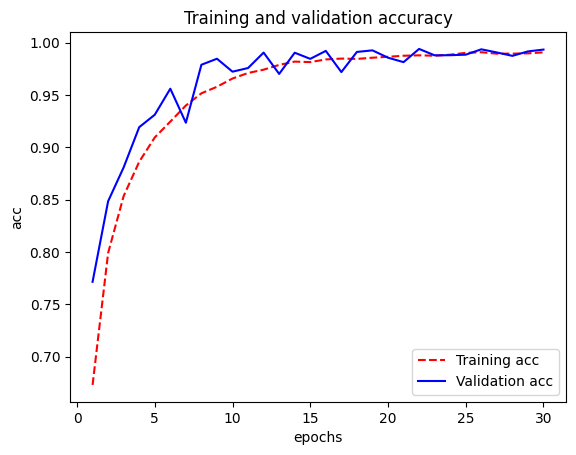

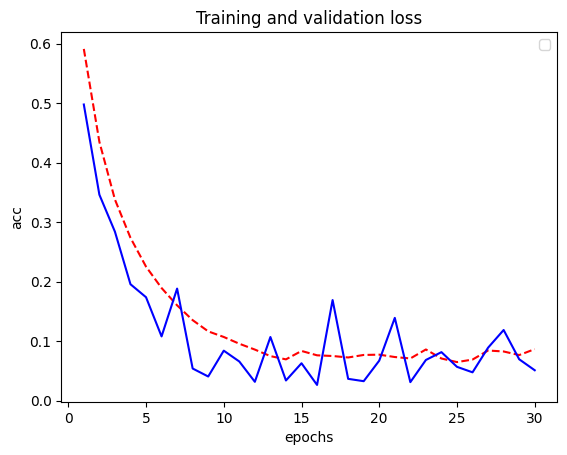

<Figure size 640x480 with 0 Axes>

In [ ]:
history_dict = history.history
print(history_dict.keys()) # Datos que se guardan en el diccionario History

acc = history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1,1)

plt.plot(epochs, acc, 'r--',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

# En la gráfica podemos observar que existe un sobre entrenamiento

In [ ]:
test_lost, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

400/400 [==============================] - 17s 41ms/step - loss: 0.0407 - acc: 0.9951
Test Accuracy: 0.9951249957084656


1/1 [==============================] - 0s 295ms/step


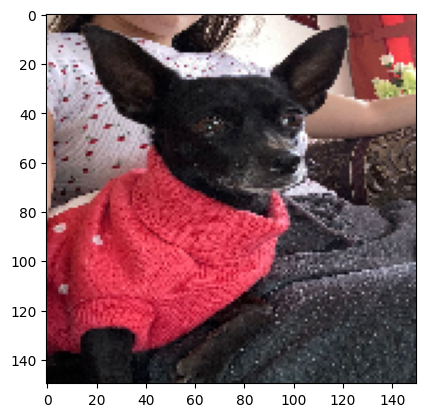

Es un perro!!!!


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

imagenes=["P1.jpg","P2.jpg","P3.jpg","P4.jpg"]

path='/content/drive/MyDrive/' + imagenes[3]
img=image.load_img(path, target_size=(150,150))
x=image.img_to_array(img)
image=np.expand_dims(x,axis=0)

classes=model.predict(image)

plt.imshow(img)
plt.show()

if classes>0: print("Es un perro!!!!")
else: print("Es un gatooo!!")

In [ ]:
# Utilizar Data Augmentation (Transformación de imágenes) para evitar
# el sobre entrenamiento

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, # Rotación de la imágenes (0-180)
    width_shift_range=0.2, # Se traslada la imagen horizontal o vertical
    height_shift_range=0.2,
    shear_range=0.2, # Aplicar transformaciones de corte al azar
    zoom_range=0.2,   # Aplicar zoo aleatorio dentro de las imágenes
    horizontal_flip=True, # Voltear aleatoriamente la mitad de las imágenes hirozontalmente
    fill_mode='nearest') # Rellenar píxeles creados que pueden aparecer después de una de las transf. anteriores



AttributeError: ignored

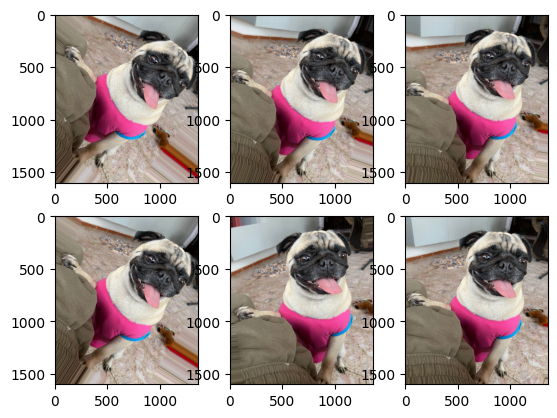

In [ ]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from tensorflow.keras.preprocessing import image


for fn in imagenes:
  path='/content/drive/MyDrive/' + fn
  img=image.load_img(path)
  data = img_to_array(img)
  samples = expand_dims(data, 0)

  # example of "rotation_range"
  datagen = ImageDataGenerator(rotation_range=45)

  it = datagen.flow(samples, batch_size=1)
  for i in range(6):
  	pyplot.subplot(230 + 1 + i)
  	batch = it.next()
  	image = batch[0].astype('uint8')
  	pyplot.imshow(image)
pyplot.show()

# Se generan imágenes aleatorias a partir de la orignial en base
# al argumento rotatio_range.

In [ ]:
# Realizando Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen=ImageDataGenerator(rescale=1.0/255.)
test_datagen=ImageDataGenerator(rescale=1.0/255.)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))
validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150))


test_generator=test_datagen.flow_from_directory(validation_dir,
                                                batch_size=20,
                                                class_mode='binary',
                                                target_size=(150,150))


In [ ]:
#Mismos hiperparámetros que el modelo anterior
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense

modelDA = Sequential()
modelDA.add(Conv2D(32,(3,3), activation='relu',
                   input_shape=(150,150,3)))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(64,(3,3),activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128,(3,3),activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128,(3,3),activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Flatten())
modelDA.add(Dense(512,activation='relu'))
modelDA.add(Dense(1,activation='sigmoid'))

from tensorflow.keras.optimizers import RMSprop
modelDA.compile(loss='binary_crossentropy',
                optimizer = RMSprop(lr=1e-4),
                metrics=['acc'])




In [ ]:
batch_size=100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyDA=modelDA.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=2
)

In [ ]:
history_dict = historyDA.history
print(history_dict.keys()) # Datos que se guardan en el diccionario History

acc = historyDA.history['acc']
val_acc=historyDA.history['val_acc']
loss=historyDA.history['loss']
val_loss=historyDA.history['val_loss']
epochs=range(1,len(acc)+1,1)

plt.plot(epochs, acc, 'r--',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [ ]:
test_lost, test_acc = model.evaluate(test_generator)
print("Test Accuracy: ", test_acc)

In [ ]:
# Utilizando TRANSFER LEARNING
# 1. Feature Extraction con VGG16
from tensorflow.keras.applications import VGG16
pre_trained_model = VGG16(input_shape=(150,150,3),
                           include_top=False,
                           weights='imagenet')
 # Forma de los tensores, incluye o no la última capa de la red, de weights se obtiene
 # la información para iniciar los pesos de los parámetros de la red

pre_trained_model.summary()

# No necesitamos las últimas capas porque crearemos unas propias para construir
# nuestro clasificador y predecir a partir del último feature map
# de forma y tamaño(4,4,512) que nos devuelve la base convolucional VGG16

In [ ]:
modelFE=Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256,activation='relu'))
modelFE.add(Dense(1,activation='sigmoid'))
modelFE.summary()

In [ ]:
modelFE.compile(loss='binary_crossentropy',
                optimizer=RMSprop(lr=1e-4),
                metrics=['acc'])


In [ ]:
historyFE=modelFE.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_steps=validation_steps,
    verbose=2)

In [ ]:
history_dict = historyFE.history
print(history_dict.keys()) # Datos que se guardan en el diccionario History

acc = historyFE.history['acc']
val_acc=historyFE.history['val_acc']
loss=historyFE.history['loss']
val_loss=historyFE.history['val_loss']
epochs=range(1,len(acc)+1,1)

plt.plot(epochs, acc, 'r--',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [ ]:
test_lost, test_acc=modelFE.evaluate(test_generator)
print("Test Accuracy:", test_acc)

In [ ]:
# 2. Aplicando Fine Tuning
# VGG16 tiene 5 bloques en la base convolucional llamadas block
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape=(150,150,3),
                          include_top=False,
                          weights='imagenet')

pre_trained_model.trainable=True
set_trainable=False

for layer in pre_trained_model.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable=False
# Las capas del block5 deben ser entrenables mediante la asignación del valor True
# al parámetro set_trainable de cada capa

In [ ]:
modelFT=Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(256,activation='relu'))
modelFT.add(Dense(1,activation='sigmoid'))
modelFT.summary()
# El pre_trained_model ahora tendrá más capas a entrenar, como se puede ver

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               2097408   
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
modelFT.compile(loss='binary_crossentropy',
               optimizer=RMSprop(lr=1e-4),
               metrics=['acc'])

historyFT=modelFT.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=100,
    validation_steps=validation_steps,
    verbose=2
)

In [ ]:
history_dict = historyFT.history
print(history_dict.keys()) # Datos que se guardan en el diccionario History

acc = historyFT.history['acc']
val_acc=historyFT.history['val_acc']
loss=historyFT.history['loss']
val_loss=historyFT.history['val_loss']
epochs=range(1,len(acc)+1,1)

plt.plot(epochs, acc, 'r--',label='Training acc')
plt.plot(epochs, val_acc,'b',label='Validation acc')
plt.title("Training and validation accuracy")
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r--')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [ ]:
test_lost, test_acc = mdoelFT.evaluate(test_generator)
print("Test Accuracy:", test_acc)

In [ ]:

accDA =historyDA.history['acc']
val_accDA = historyDA.history['val_acc']

accFE =historyFE.history['FE']
val_accFE = historyFE.history['val_FE']

accFT =historyFT.history['FT']
val_accFT = historyFT.history['val_FT']

epochs = range(1,len(accDA)+1,1)
plt.figure(figsize=(10,18))

plt.plot(epochs, accFT, 'k',label='Fine Tunning - Training acc')
plt.plot(epochs, val_accFT, 'b',label='Fine Tunning - Training acc')

plt.plot(epochs, accFE, 'r--',label='Featue Extraction')
plt.plot(epochs, val_accFE, 'm--',label='Featue Extraction')

plt.plot(epochs, accDA, 'g:',label='Data Augmentation - Training acc')
plt.plot(epochs, val_accDA, 'c:',label='Data Augmentation - Validation acc')

plt.title("Training and Validation accuracy")
plt.ylabel('acc')

plt.ylim(0.5,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()
